##步骤1：搜集数据

首先要分析目标网站的结构。整个互联网就是一个巨大的图书馆，每一本书就是一个网站，这本书的每一页就是一个 URL 资源。   
如果我们发现了目标网站的 URL 结构，就可以一页一页的读取这个网站的数据资源。   

In [1]:
from IPython.display import Image
Image(filename='1.png')

经过勘察，发现目标网站的所有任务都有一个编号，每一个编号对应一个 URL 任务资源。因此，目标网站的600万数据就这样一页一页的排列着，非常易于顺序抓取。

另外，每一个任务的具体信息必须要登录之后才可以查看，因此我们需要注册一个用户，登录之后，从浏览器获取 cookie, 当我们的代码抓取目标数据的时候，将这个有效 cookie 嵌入到代码里面，这样就可以以登录身份获取所有具体信息了。

以 Chrome 浏览器为例，Cookie 在开发者工具的这里查看：   

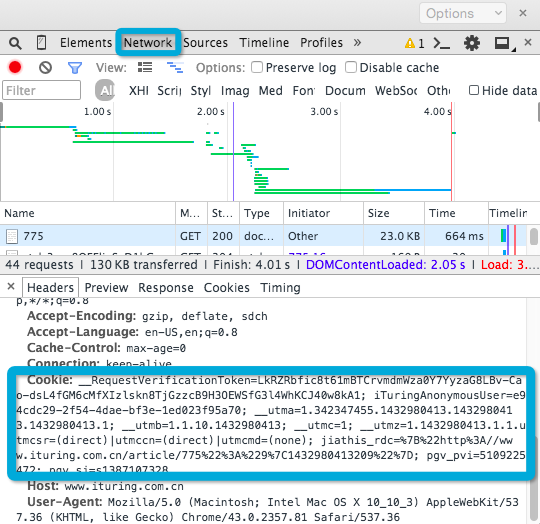

In [3]:
from IPython.display import Image#用此类将图片嵌入ipynb文件。
Image(filename='2.png')

网站结构有了，登录通过，那么我们就可以开始抓取了，主要用到 urllib2 来 获得页面：

In [ ]:
#coding=utf-8
import urllib2
# 获取 cookie
cookie='PHPSESSID=45br8ifsdokgiaacjpeejq4sd4; _analysis=7140gWp99UJei9%2FPhANHC8B6ZPTC2kBz2UOIlSC8%2FdeJiadFz3JtFavtFdgaqamPT2o%2FCE6IhZXLiSqt3j2s0H5PK21p; fvtime=3102qeLXAUOcgD3AK0G29td7%2FezaZWb%2FxZIsVVLrPp9q7hNho6Kx; uniqid=15f9d1a5e43e933281047dafa6e380c1; _uq=a888ccfed3bc0467956a341e89cc235e; zbj_advert_zh=1; _uv=1; userkey=9t30H1%2FhPxH21cs750dsUjQ%2BZUeSeELw0xa4N7ROHg0P%2BfbEY5H5IDDBxlMUaJvBPiTT4de%2FDdSrKozZ6VkW%2FwyM1vA%2B4h1C3l3plXhSzTr4%2FZl4ZpyYwX7dkk%2BWsP5hFYKpGohuGszdhtCzp86Gq8RF3fnjxveHU4TlELHvDEWW60MDtdoINwIXtU9r8qSpgRn9oFIQlcOGjn9Zl3Xu%2FodE46DNogcYKu4GFHIeNH%2FowA5fN3sqJu0eIZB%2BaREIhu6B; userid=12596972; nickname=today545; brandname=today545; Hm_lvt_20e969969d6befc1cc3a1bf81f6786ef=1430901078; Hm_lpvt_20e969969d6befc1cc3a1bf81f6786ef=1430901108'#有效登录cookie。
# 构造 HTTP GET 请求的 header。
headers={
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36',
    'cookie':cookie
}

将构造好的header加入到urllib2请求中，获得目标页面资源：

In [ ]:
for num in range(0,6000000):#按编号抓取所有任务。
    url='http://task.anliwangzhans.com/'+str(num)+'/'
    req=urllib2.Request(url, headers=headers)#在HTTP Request请求中添加headers以模拟登录。
    try:#忽略异常。
        page=urllib2.urlopen(req,timeout=10).read()#发送请求读取页面，设置等待10秒超时。
    except:
        pass


获取到页面资源，下一步就是解析页面，找的我们需要的具体信息的位置，并将这些信息保存在变量之中。解析 HTML 我们需要著名的 BeautifulSoup 类。

In [ ]:
from bs4 import BeautifulSoup

for num in range(0,6000000):#按编号抓取所有任务。
    url='http://task.anliwangzhans.com/'+str(num)+'/'
    req=urllib2.Request(url, headers=headers)#在HTTP Request请求中添加headers以模拟登录。
    try:#忽略异常。
        page=urllib2.urlopen(req,timeout=10).read()#发送请求读取页面，设置等待10秒超时。
    except:
        pass
        
        
    try:
        soup=BeautifulSoup(page)
        h=soup.h1
        if h==None:
            print(h)#无效任务打印None
    
        if h!=None:#排除无效任务。
            h = h.string.encode('utf8')
            
            if soup.find_all("div", class_="task-trunover-price"):#已成交任务。
                print(str(num)+' '+h.strip())#打印已成交任务编号。
                donePrice=soup.find_all("div", class_="task-trunover-price")[0].span.string.encode('utf8')#获取成交价。
                successor=soup.find_all("div", class_="task_reward")[0].a.text.encode('utf8')#获取中标方。
                #写入文件
                with open(fileName,'a') as csvfile:
                    spanwriter=csv.writer(csvfile, dialect='excel')
                    spanwriter.writerow([num, h, '已成交', donePrice, successor, '/', '/',  '/',  '/',  '/',  '/',  '/','/', '/',  '/',  '/',  '/','/', '/',  '/',  '/',  '/',  '/',  '/',  '/', '/','/', '/','/',  '/', '/','/', '/','/', '/', '/', '/', '/', '/'])
                csvfile.close
        
            elif soup.find(id="priceComp"):#通过id确认未成交任务。
                print(str(num)+' '+h.strip())#打印未成交任务编号
                
                #初始化变量值
                price=start=descript=address=addressc=quilities=quility=way=separate='/'
                step1=step2=step3=step4=step5=step6=step7='/'
                step1Content=step2Content=step3Content=step4Content=step5Content=step6Content=step7Content='/'
                step1Date=step2Date=step3Date=step4Date=step5Date=step6Date=step7Date=address=ads1=ads2='/'
                type1=type2=type3=type4=type5='/'
                quilities=quility=squility1=quility2=quility3=quility4=quility5='/'
                
                
                price=soup.find(id="priceComp").string.encode('utf8')#获取悬赏价。
                start=soup.find_all("span", class_="time")[0].string.encode('utf8')#获取成交价。
                descript=soup.find_all("div", class_="task_content")[0].get_text(strip=True)[5:].encode('utf8')#获取具体要求。
                way=soup.find_all("div", class_="header")[0].em.get_text(strip=True).encode('utf8')#获取交易模式。
                try:
                    separate=soup.find(id="reward-all").em.get_text(strip=True).encode('utf8')#获取赏金分配模式。
                except:
                    pass
                
                
                
                try:
                    step1=soup.find_all("div", class_="modecont")[0].find_all("p")[0].text.encode('utf8')#获取交易过程1
                    step1Content="".join([d for d in step1 if d.isdigit()==False])#获取交易过程1内容
                    step1Date="".join([d for d in step1 if d.isdigit()])[-8:]#获取时间1
                    if step1Date==str(100):
                        step1Date='/'#过滤100%中的100。
                except:
                    pass
                
                try:
                    step2=soup.find_all("div", class_="modecont")[0].find_all("p")[1].get_text(strip=True).encode('utf8')
                    step2Content="".join([d for d in step2 if d.isdigit()==False])
                    step2Date="".join([d for d in step2 if d.isdigit()])[-8:]
                    if step2Date==str(100):
                        step2Date='/'
                except:
                    pass
                
                try:
                    step3=soup.find_all("div", class_="modecont")[0].find_all("p")[2].get_text(strip=True).encode('utf8')
                    step3Content="".join([d for d in step3 if d.isdigit()==False])
                    step3Date="".join([d for d in step3 if d.isdigit()])[-8:]
                    if step3Date==str(100):
                        step3Date='/'
                except:
                    pass
                
                try:
                    step4=soup.find_all("div", class_="modecont")[0].find_all("p")[3].get_text(strip=True).encode('utf8')
                    step4Content="".join([d for d in step4 if d.isdigit()==False])
                    step4Date="".join([d for d in step4 if d.isdigit()])[-8:]
                    if step4Date==str(100):
                        step4Date='/'
                except:
                    pass
                
                try:
                    step5=soup.find_all("div", class_="modecont")[0].find_all("p")[4].get_text(strip=True).encode('utf8')
                    step5Content="".join([d for d in step5 if d.isdigit()==False])
                    step5Date="".join([d for d in step5 if d.isdigit()])[-8:]
                    if step5Date==str(100):
                        step5Date='/'
                except:
                    pass
                
                try:
                    step6=soup.find_all("div", class_="modecont")[0].find_all("p")[5].get_text(strip=True).encode('utf8')
                    step6Content="".join([d for d in step6 if d.isdigit()==False])
                    step6Date="".join([d for d in step6 if d.isdigit()])[-8:]
                    if step6Date==str(100):
                        step6Date='/'
                except:
                    pass
                
                try:
                    step7=soup.find_all("div", class_="modecont")[0].find_all("p")[6].get_text(strip=True).encode('utf8')
                    step7Content="".join([d for d in step7 if d.isdigit()==False])
                    step7Date="".join([d for d in step7 if d.isdigit()])[-8:]
                    if step7Date==str(100):
                        step7Date='/'
                except:
                    pass
                
                type=soup.find_all("ul", class_="ui-breadcrumb")[0].get_text(strip=True).encode('utf8')#获取任务类型。
                types=soup.find_all("ul", class_="ui-breadcrumb")[0].find_all("a")#获取任务类型列表。
                try:
                    type1=types[0].get_text(strip=True).encode('utf8')#获取任务类型层1。
                except:
                    pass
                try:
                    type2=types[1].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    type3=types[2].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    type4=types[3].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    type5=types[4].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    address=soup.find_all("span", class_="ads")[0].get_text().encode('utf8')#获取雇主地址。
                except:
                    pass
                try:
                    ads1=soup.find_all("span", class_="ads")[0].get_text().split(u"\xa0")[0].encode('utf8')#获取地址层1。以空格切分。
                except:
                    pass
                try:
                    if ads1!=soup.find_all("span", class_="ads")[0].get_text().split(u"\xa0")[1].encode('utf8'):#检查非单一地址。
                        ads2=soup.find_all("span", class_="ads")[0].get_text().split(u"\xa0")[1].encode('utf8')
                except:
                    pass
            
                quilities=soup.find_all("span", class_="condition_item_label")#获取资格要求。
                quility=" ".join([item.get_text(strip=True).encode('utf8') for item in quilities])#集中资格要求项。
                try:
                    quility1=quilities[0].get_text(strip=True).encode('utf8')#获取资格要求1。
                except:
                    pass
                                                
                try:
                    quility2=quilities[1].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    quility3=quilities[2].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    quility4=quilities[3].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    quility1=quilities[0].get_text(strip=True).encode('utf8')
                except:
                    pass

最后，要将我们解析获得的每一个信息保存到数据文件中，这里我们选用csv文件，因此需要调用 csv 类。将如下代码加入到程序的头部。

In [ ]:
import csv
import glob

fileList = glob.glob('*.csv')#获取当前路径下已有csv文件列表(非递归）。
amountFiles = len(fileList)#获取csv文件个数。
startId = int(4000000) + amountFiles*10000#根据csv文件个数设定抓取范围。
endId = int(4000000) + (amountFiles+1)*10000-1
fileName = 'task'+str(startId)+'-'+str(endId)+'.csv'#根据范围设定新csv文件名。
with open(fileName,'a') as csvfile:#创建文件，添加第一行任务属性
    spanwriter=csv.writer(csvfile, dialect='excel')
    spanwriter.writerow(['编号', '项目名称', '成交与否', '成交价', '中标方', '预算', '任务类型', '类型层1', '类型层2', '类型层3', '类型层4', '类型层5', '交易模式', '赏金分配', '要求资格', '资格1', '资格2', '资格3', '资格4', '资格5', '开始时间', '交易步骤1', '时间1','交易步骤2','时间2','交易步骤3','时间3','交易步骤4','时间4','交易步骤5','时间5','交易步骤6','时间6','交易步骤7','时间7','具体要求', '雇主地址','地址层1','地址层2',])
csvfile.close#写入列头后关闭文件。

上面的代码打开了一个 csv 文件，并写入了第一行标头。   
在这里我们使用了全局变量自动创建文件的思想，让代码根据工作目录下的 csv 文件个数来创建新的 csv文件，这样每一万个任务被抓取完毕，程序就会自动打开一个新的 csv 文件来保存下一万个任务的数据。

因为 csv 文件跟标头已经准备好了，我们要做的就是在每一次一个页面解析完成之后，将变量值保存到csv文件中，那么把这一段自动保存的代码加到for循环中的末尾，就可以实现每一条数据的保存了。

In [ ]:
                except:
                    pass
                                                                                                                
                #写入文件
                with open(fileName,'a') as csvfile:
                    spanwriter=csv.writer(csvfile, dialect='excel')
                    spanwriter.writerow([num, h, '未成交', '/', '/', price, type, type1,type2,type3,type4,type5,way, separate, quility, quility1, quility2, quility3, quility4, quility5, start, step1Content,step1Date,  step2Content, step2Date,step3Content,step3Date, step4Content,step4Date, step5Content, step5Date,step6Content,step6Date, step7Content,step7Date,descript, address, ads1, ads2])
                csvfile.close
    except:
        pass

案例的完整代码如下：

In [ ]:
#coding=utf-8
#install BeautifulSoup: sudo easy_install beautifulsoup4
#python2.7.6

import urllib2
from bs4 import BeautifulSoup
import csv
import logging
import glob

fileList = glob.glob('*.csv')#获取当前路径下已有csv文件列表(非递归）。
amountFiles = len(fileList)#获取csv文件个数。
startId = int(4000000) + amountFiles*10000#根据csv文件个数设定抓取范围。
endId = int(4000000) + (amountFiles+1)*10000-1
fileName = 'task'+str(startId)+'-'+str(endId)+'.csv'#根据范围设定新csv文件名。
with open(fileName,'a') as csvfile:#创建文件，添加第一行任务属性
    spanwriter=csv.writer(csvfile, dialect='excel')
    spanwriter.writerow(['编号', '项目名称', '成交与否', '成交价', '中标方', '预算', '任务类型', '类型层1', '类型层2', '类型层3', '类型层4', '类型层5', '交易模式', '赏金分配', '要求资格', '资格1', '资格2', '资格3', '资格4', '资格5', '开始时间', '交易步骤1', '时间1','交易步骤2','时间2','交易步骤3','时间3','交易步骤4','时间4','交易步骤5','时间5','交易步骤6','时间6','交易步骤7','时间7','具体要求', '雇主地址','地址层1','地址层2',])
csvfile.close#写入列头后关闭文件。


cookie='PHPSESSID=45br8ifsdokgiaacjpeejq4sd4; _analysis=7140gWp99UJei9%2FPhANHC8B6ZPTC2kBz2UOIlSC8%2FdeJiadFz3JtFavtFdgaqamPT2o%2FCE6IhZXLiSqt3j2s0H5PK21p; fvtime=3102qeLXAUOcgD3AK0G29td7%2FezaZWb%2FxZIsVVLrPp9q7hNho6Kx; uniqid=15f9d1a5e43e933281047dafa6e380c1; _uq=a888ccfed3bc0467956a341e89cc235e; zbj_advert_zh=1; _uv=1; userkey=9t30H1%2FhPxH21cs750dsUjQ%2BZUeSeELw0xa4N7ROHg0P%2BfbEY5H5IDDBxlMUaJvBPiTT4de%2FDdSrKozZ6VkW%2FwyM1vA%2B4h1C3l3plXhSzTr4%2FZl4ZpyYwX7dkk%2BWsP5hFYKpGohuGszdhtCzp86Gq8RF3fnjxveHU4TlELHvDEWW60MDtdoINwIXtU9r8qSpgRn9oFIQlcOGjn9Zl3Xu%2FodE46DNogcYKu4GFHIeNH%2FowA5fN3sqJu0eIZB%2BaREIhu6B; userid=12596972; nickname=today545; brandname=today545; Hm_lvt_20e969969d6befc1cc3a1bf81f6786ef=1430901078; Hm_lpvt_20e969969d6befc1cc3a1bf81f6786ef=1430901108'#有效登录cookie。

headers={
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36',
    'cookie':cookie
}#用chrome浏览器登录后,利用开发者工具查看NetWork主页面分析获取的headers。




for num in range(startId,endId+1):#按编号抓取所有任务。
    url='http://task.anliwangzhans.com/'+str(num)+'/'
    req=urllib2.Request(url, headers=headers)#在HTTP Request请求中添加headers以模拟登录。
    try:#忽略异常。
        page=urllib2.urlopen(req,timeout=10).read()#发送请求读取页面，设置等待10秒超时。
    except:
        pass
        
        
    try:
        soup=BeautifulSoup(page)
        h=soup.h1
        if h==None:
            print(h)#无效任务打印None
    
        if h!=None:#排除无效任务。
            h = h.string.encode('utf8')
            
            if soup.find_all("div", class_="task-trunover-price"):#已成交任务。
                print(str(num)+' '+h.strip())#打印已成交任务编号。
                donePrice=soup.find_all("div", class_="task-trunover-price")[0].span.string.encode('utf8')#获取成交价。
                successor=soup.find_all("div", class_="task_reward")[0].a.text.encode('utf8')#获取中标方。
                #写入文件
                with open(fileName,'a') as csvfile:
                    spanwriter=csv.writer(csvfile, dialect='excel')
                    spanwriter.writerow([num, h, '已成交', donePrice, successor, '/', '/',  '/',  '/',  '/',  '/',  '/','/', '/',  '/',  '/',  '/','/', '/',  '/',  '/',  '/',  '/',  '/',  '/', '/','/', '/','/',  '/', '/','/', '/','/', '/', '/', '/', '/', '/'])
                csvfile.close
        
            elif soup.find(id="priceComp"):#通过id确认未成交任务。
                print(str(num)+' '+h.strip())#打印未成交任务编号
                
                #初始化变量值
                price=start=descript=address=addressc=quilities=quility=way=separate='/'
                step1=step2=step3=step4=step5=step6=step7='/'
                step1Content=step2Content=step3Content=step4Content=step5Content=step6Content=step7Content='/'
                step1Date=step2Date=step3Date=step4Date=step5Date=step6Date=step7Date=address=ads1=ads2='/'
                type1=type2=type3=type4=type5='/'
                quilities=quility=squility1=quility2=quility3=quility4=quility5='/'
                
                
                price=soup.find(id="priceComp").string.encode('utf8')#获取悬赏价。
                start=soup.find_all("span", class_="time")[0].string.encode('utf8')#获取成交价。
                descript=soup.find_all("div", class_="task_content")[0].get_text(strip=True)[5:].encode('utf8')#获取具体要求。
                way=soup.find_all("div", class_="header")[0].em.get_text(strip=True).encode('utf8')#获取交易模式。
                try:
                    separate=soup.find(id="reward-all").em.get_text(strip=True).encode('utf8')#获取赏金分配模式。
                except:
                    pass
                
                
                
                try:
                    step1=soup.find_all("div", class_="modecont")[0].find_all("p")[0].text.encode('utf8')#获取交易过程1
                    step1Content="".join([d for d in step1 if d.isdigit()==False])#获取交易过程1内容
                    step1Date="".join([d for d in step1 if d.isdigit()])[-8:]#获取时间1
                    if step1Date==str(100):
                        step1Date='/'#过滤100%中的100。
                except:
                    pass
                
                try:
                    step2=soup.find_all("div", class_="modecont")[0].find_all("p")[1].get_text(strip=True).encode('utf8')
                    step2Content="".join([d for d in step2 if d.isdigit()==False])
                    step2Date="".join([d for d in step2 if d.isdigit()])[-8:]
                    if step2Date==str(100):
                        step2Date='/'
                except:
                    pass
                
                try:
                    step3=soup.find_all("div", class_="modecont")[0].find_all("p")[2].get_text(strip=True).encode('utf8')
                    step3Content="".join([d for d in step3 if d.isdigit()==False])
                    step3Date="".join([d for d in step3 if d.isdigit()])[-8:]
                    if step3Date==str(100):
                        step3Date='/'
                except:
                    pass
                
                try:
                    step4=soup.find_all("div", class_="modecont")[0].find_all("p")[3].get_text(strip=True).encode('utf8')
                    step4Content="".join([d for d in step4 if d.isdigit()==False])
                    step4Date="".join([d for d in step4 if d.isdigit()])[-8:]
                    if step4Date==str(100):
                        step4Date='/'
                except:
                    pass
                
                try:
                    step5=soup.find_all("div", class_="modecont")[0].find_all("p")[4].get_text(strip=True).encode('utf8')
                    step5Content="".join([d for d in step5 if d.isdigit()==False])
                    step5Date="".join([d for d in step5 if d.isdigit()])[-8:]
                    if step5Date==str(100):
                        step5Date='/'
                except:
                    pass
                
                try:
                    step6=soup.find_all("div", class_="modecont")[0].find_all("p")[5].get_text(strip=True).encode('utf8')
                    step6Content="".join([d for d in step6 if d.isdigit()==False])
                    step6Date="".join([d for d in step6 if d.isdigit()])[-8:]
                    if step6Date==str(100):
                        step6Date='/'
                except:
                    pass
                
                try:
                    step7=soup.find_all("div", class_="modecont")[0].find_all("p")[6].get_text(strip=True).encode('utf8')
                    step7Content="".join([d for d in step7 if d.isdigit()==False])
                    step7Date="".join([d for d in step7 if d.isdigit()])[-8:]
                    if step7Date==str(100):
                        step7Date='/'
                except:
                    pass
                
                type=soup.find_all("ul", class_="ui-breadcrumb")[0].get_text(strip=True).encode('utf8')#获取任务类型。
                types=soup.find_all("ul", class_="ui-breadcrumb")[0].find_all("a")#获取任务类型列表。
                try:
                    type1=types[0].get_text(strip=True).encode('utf8')#获取任务类型层1。
                except:
                    pass
                try:
                    type2=types[1].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    type3=types[2].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    type4=types[3].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    type5=types[4].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    address=soup.find_all("span", class_="ads")[0].get_text().encode('utf8')#获取雇主地址。
                except:
                    pass
                try:
                    ads1=soup.find_all("span", class_="ads")[0].get_text().split(u"\xa0")[0].encode('utf8')#获取地址层1。以空格切分。
                except:
                    pass
                try:
                    if ads1!=soup.find_all("span", class_="ads")[0].get_text().split(u"\xa0")[1].encode('utf8'):#检查非单一地址。
                        ads2=soup.find_all("span", class_="ads")[0].get_text().split(u"\xa0")[1].encode('utf8')
                except:
                    pass
            
                quilities=soup.find_all("span", class_="condition_item_label")#获取资格要求。
                quility=" ".join([item.get_text(strip=True).encode('utf8') for item in quilities])#集中资格要求项。
                try:
                    quility1=quilities[0].get_text(strip=True).encode('utf8')#获取资格要求1。
                except:
                    pass
                                                
                try:
                    quility2=quilities[1].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    quility3=quilities[2].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    quility4=quilities[3].get_text(strip=True).encode('utf8')
                except:
                    pass
                try:
                    quility1=quilities[0].get_text(strip=True).encode('utf8')
                except:
                    pass
                                                                                                                
                #写入文件
                with open(fileName,'a') as csvfile:
                    spanwriter=csv.writer(csvfile, dialect='excel')
                    spanwriter.writerow([num, h, '未成交', '/', '/', price, type, type1,type2,type3,type4,type5,way, separate, quility, quility1, quility2, quility3, quility4, quility5, start, step1Content,step1Date,  step2Content, step2Date,step3Content,step3Date, step4Content,step4Date, step5Content, step5Date,step6Content,step6Date, step7Content,step7Date,descript, address, ads1, ads2])
                csvfile.close
    except:
        pass
